In [2]:
import numpy as np
import pandas as pd
import sklearn
import os
import subprocess
import scipy
import tensorflow as tf
import math
from tensorflow.python.framework import ops
from scipy import stats
import pydot
import matplotlib.pyplot as plt

In [9]:
from keras.models import Sequential
from keras.layers import *
from keras.initializers import *
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers import Dense
from keras.utils import plot_model

In [4]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
df= pd.read_csv("F:/ML/Zenrays/AI_ML_Feb25_Kormangla/hands on/pima-indians-diabetes.csv")
df.columns = np.arange(9) #rename labels
df

,0,1,2,3,4,5,6,7,8
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [6]:
X = df.iloc[:,0:8]
Y = df.iloc[:,8]

In [7]:
funct = []
funct.append('tanh')
funct.append('sigmoid')
funct.append('relu')
funct.append('softplus')
funct.append('softsign')
funct.append('hard_sigmoid')
funct.append('linear')

In [8]:
analysisdf = pd.DataFrame(columns= ["Input layer activation","Hidden layer activation", "Output layer activation",
                                    "accuracy"])
l = 0
analysisdf  

,Input layer activation,Hidden layer activation,Output layer activation,accuracy


In [11]:
for fun in funct:
    for func in funct:
        for functi in funct:
            
            model = Sequential()
            model.add(Dense(8, input_dim=8, activation=fun, kernel_initializer='RandomUniform', bias_initializer='zeros'))
            model.add(Dense(4, activation= func))
            model.add(Dense(1, activation= functi))
            model.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
            history = model.fit(X, Y, epochs=500, batch_size=100, ) #validation_split=0.33
            scores = model.evaluate(X, Y)
            analysisdf.loc[l,"Input layer activation"]=  fun
            analysisdf.loc[l,"Hidden layer activation"]= func
            analysisdf.loc[l,"Output layer activation"]= functi
            analysisdf.loc[l,"accuracy"]= (" \n%s: %.2f%%" % ( model.metrics_names[1], scores[1]*100))
            l += 1
            

Epoch 1/500
767/767 [==============================] - 0s 391us/step - loss: 5.0094 - acc: 0.1695
Epoch 2/500
767/767 [==============================] - 0s 18us/step - loss: 3.4552 - acc: 0.4237
Epoch 3/500
767/767 [==============================] - 0s 22us/step - loss: 3.4137 - acc: 0.3950
Epoch 4/500
767/767 [==============================] - 0s 18us/step - loss: 3.3084 - acc: 0.4407
Epoch 5/500
767/767 [==============================] - 0s 22us/step - loss: 3.2391 - acc: 0.5554
Epoch 6/500
767/767 [==============================] - 0s 17us/step - loss: 3.2532 - acc: 0.5267
Epoch 7/500
767/767 [==============================] - 0s 21us/step - loss: 3.2152 - acc: 0.4824
Epoch 8/500
767/767 [==============================] - 0s 21us/step - loss: 3.1888 - acc: 0.6258
Epoch 9/500
767/767 [==============================] - 0s 18us/step - loss: 3.2111 - acc: 0.5932
Epoch 10/500
767/767 [==============================] - 0s 25us/step - loss: 3.1935 - acc: 0.5984
Epoch 11/500
767/767 [======

767/767 [==============================] - 0s 20us/step - loss: 0.5320 - acc: 0.7484
Epoch 85/500
767/767 [==============================] - 0s 18us/step - loss: 0.5314 - acc: 0.7379
Epoch 86/500
767/767 [==============================] - 0s 18us/step - loss: 0.5696 - acc: 0.7210
Epoch 87/500
767/767 [==============================] - 0s 23us/step - loss: 0.5551 - acc: 0.7484
Epoch 88/500
767/767 [==============================] - 0s 21us/step - loss: 0.5247 - acc: 0.7523
Epoch 89/500
767/767 [==============================] - 0s 18us/step - loss: 0.6126 - acc: 0.7093
Epoch 90/500
767/767 [==============================] - 0s 20us/step - loss: 0.5370 - acc: 0.7340
Epoch 91/500
767/767 [==============================] - 0s 20us/step - loss: 0.5459 - acc: 0.7419
Epoch 92/500
767/767 [==============================] - 0s 25us/step - loss: 0.5552 - acc: 0.7288
Epoch 93/500
767/767 [==============================] - 0s 20us/step - loss: 0.5421 - acc: 0.7458
Epoch 94/500
767/767 [===========

767/767 [==============================] - 0s 22us/step - loss: 0.5118 - acc: 0.7588
Epoch 168/500
767/767 [==============================] - 0s 17us/step - loss: 0.5575 - acc: 0.7458
Epoch 169/500
767/767 [==============================] - 0s 20us/step - loss: 0.5572 - acc: 0.7184
Epoch 170/500
767/767 [==============================] - 0s 20us/step - loss: 0.5144 - acc: 0.7510
Epoch 171/500
767/767 [==============================] - 0s 23us/step - loss: 0.5664 - acc: 0.7627
Epoch 172/500
767/767 [==============================] - 0s 23us/step - loss: 0.7772 - acc: 0.6662
Epoch 173/500
767/767 [==============================] - 0s 18us/step - loss: 0.5216 - acc: 0.7458
Epoch 174/500
767/767 [==============================] - 0s 21us/step - loss: 0.5301 - acc: 0.7497
Epoch 175/500
767/767 [==============================] - 0s 22us/step - loss: 0.5198 - acc: 0.7614
Epoch 176/500
767/767 [==============================] - 0s 21us/step - loss: 0.5577 - acc: 0.7262
Epoch 177/500
767/767 [=

767/767 [==============================] - 0s 20us/step - loss: 0.4961 - acc: 0.7601
Epoch 250/500
767/767 [==============================] - 0s 17us/step - loss: 0.5231 - acc: 0.7679
Epoch 251/500
767/767 [==============================] - 0s 20us/step - loss: 0.5363 - acc: 0.7484
Epoch 252/500
767/767 [==============================] - 0s 20us/step - loss: 0.4928 - acc: 0.7731
Epoch 253/500
767/767 [==============================] - 0s 23us/step - loss: 0.5012 - acc: 0.7510
Epoch 254/500
767/767 [==============================] - 0s 20us/step - loss: 0.6467 - acc: 0.6741
Epoch 255/500
767/767 [==============================] - 0s 20us/step - loss: 0.5424 - acc: 0.7223
Epoch 256/500
767/767 [==============================] - 0s 18us/step - loss: 0.5162 - acc: 0.7497
Epoch 257/500
767/767 [==============================] - 0s 23us/step - loss: 0.5062 - acc: 0.7718
Epoch 258/500
767/767 [==============================] - 0s 20us/step - loss: 0.5178 - acc: 0.7627
Epoch 259/500
767/767 [=

767/767 [==============================] - 0s 18us/step - loss: 0.5629 - acc: 0.6975
Epoch 332/500
767/767 [==============================] - 0s 20us/step - loss: 0.5440 - acc: 0.7066
Epoch 333/500
767/767 [==============================] - 0s 23us/step - loss: 0.5318 - acc: 0.7210
Epoch 334/500
767/767 [==============================] - 0s 20us/step - loss: 0.5238 - acc: 0.7223
Epoch 335/500
767/767 [==============================] - 0s 18us/step - loss: 0.5180 - acc: 0.7223
Epoch 336/500
767/767 [==============================] - 0s 18us/step - loss: 0.5085 - acc: 0.7340
Epoch 337/500
767/767 [==============================] - 0s 22us/step - loss: 0.4986 - acc: 0.7536
Epoch 338/500
767/767 [==============================] - 0s 23us/step - loss: 0.5003 - acc: 0.7575
Epoch 339/500
767/767 [==============================] - 0s 29us/step - loss: 0.4962 - acc: 0.7588
Epoch 340/500
767/767 [==============================] - 0s 25us/step - loss: 0.5010 - acc: 0.7510
Epoch 341/500
767/767 [=

767/767 [==============================] - 0s 18us/step - loss: 0.5294 - acc: 0.7379
Epoch 414/500
767/767 [==============================] - 0s 22us/step - loss: 0.5034 - acc: 0.7614
Epoch 415/500
767/767 [==============================] - 0s 18us/step - loss: 0.5008 - acc: 0.7484
Epoch 416/500
767/767 [==============================] - 0s 17us/step - loss: 0.4940 - acc: 0.7562
Epoch 417/500
767/767 [==============================] - 0s 18us/step - loss: 0.4849 - acc: 0.7523
Epoch 418/500
767/767 [==============================] - 0s 22us/step - loss: 0.5118 - acc: 0.7471
Epoch 419/500
767/767 [==============================] - 0s 22us/step - loss: 0.5455 - acc: 0.7210
Epoch 420/500
767/767 [==============================] - 0s 22us/step - loss: 0.4839 - acc: 0.7471
Epoch 421/500
767/767 [==============================] - 0s 22us/step - loss: 0.5286 - acc: 0.7575
Epoch 422/500
767/767 [==============================] - 0s 21us/step - loss: 0.5164 - acc: 0.7405
Epoch 423/500
767/767 [=

767/767 [==============================] - 0s 23us/step - loss: 0.5203 - acc: 0.7575
Epoch 496/500
767/767 [==============================] - 0s 21us/step - loss: 0.5622 - acc: 0.7184
Epoch 497/500
767/767 [==============================] - 0s 17us/step - loss: 0.5015 - acc: 0.7666
Epoch 498/500
767/767 [==============================] - 0s 20us/step - loss: 0.5319 - acc: 0.7471
Epoch 499/500
767/767 [==============================] - 0s 21us/step - loss: 0.4870 - acc: 0.7627
Epoch 500/500
767/767 [==============================] - 0s 81us/step
Epoch 1/500
767/767 [==============================] - 0s 545us/step - loss: 0.6516 - acc: 0.6480
Epoch 2/500
767/767 [==============================] - 0s 22us/step - loss: 0.6425 - acc: 0.6506
Epoch 3/500
767/767 [==============================] - 0s 22us/step - loss: 0.6384 - acc: 0.6545
Epoch 4/500
767/767 [==============================] - 0s 21us/step - loss: 0.6336 - acc: 0.6519
Epoch 5/500
767/767 [==============================] - 0s 18

KeyboardInterrupt: 

In [1]:
analysisdf

NameError: name 'analysisdf' is not defined

In [ ]:
    plt.plot(history.history['acc'])
    #plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

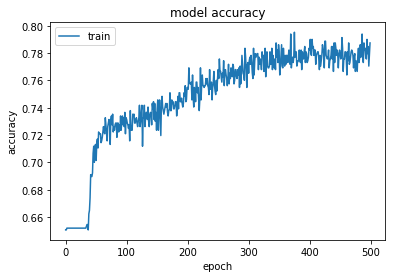

In [112]:
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


767/767 [==============================] - 0s 139us/step

acc: 79.79%


In [24]:
#normalizing
dfn = (df-df.min())/(df.max()-df.min())
dfn

,0,1,2,3,4,5,6,7,8
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0
5,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1.0
6,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0.0
7,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1.0
8,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000,1.0
9,0.235294,0.552764,0.754098,0.000000,0.000000,0.560358,0.048249,0.150000,0.0


In [25]:
X = dfn.iloc[:,0:8]
Y = dfn.iloc[:,8]

In [26]:
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

In [28]:
model.fit(X, Y, epochs=150, batch_size=500)

Epoch 1/150
767/767 [==============================] - 0s 359us/step - loss: 0.6883 - acc: 0.6519
Epoch 2/150
767/767 [==============================] - 0s 11us/step - loss: 0.6824 - acc: 0.6519
Epoch 3/150
767/767 [==============================] - 0s 6us/step - loss: 0.6792 - acc: 0.6519
Epoch 4/150
767/767 [==============================] - 0s 8us/step - loss: 0.6764 - acc: 0.6519
Epoch 5/150
767/767 [==============================] - 0s 9us/step - loss: 0.6744 - acc: 0.6519
Epoch 6/150
767/767 [==============================] - 0s 9us/step - loss: 0.6725 - acc: 0.6519
Epoch 7/150
767/767 [==============================] - 0s 8us/step - loss: 0.6705 - acc: 0.6519
Epoch 8/150
767/767 [==============================] - 0s 8us/step - loss: 0.6688 - acc: 0.6519
Epoch 9/150
767/767 [==============================] - 0s 7us/step - loss: 0.6672 - acc: 0.6519
Epoch 10/150
767/767 [==============================] - 0s 8us/step - loss: 0.6660 - acc: 0.6519
Epoch 11/150
767/767 [==============

In [29]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


767/767 [==============================] - 0s 110us/step

acc: 65.19%
